In [4]:
import sys
import xlsxwriter
import pandas as pd
import sys
import psycopg2
import os
from dotenv import load_dotenv
from datetime import date

today = date.today()
load_dotenv()

#configurar la conexion a la base de datos
DB_USERNAME = os.getenv('DB_USERNAME')
DB_DATABASE = os.getenv('DB_DATABASE')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')
DB_HOST=os.getenv('DB_HOST')

# Conectar a DB
# Conectar a PostgreSQL
try:
    cnx = psycopg2.connect(
        user=DB_USERNAME,
        password=DB_PASSWORD,
        host=DB_HOST,
        port=DB_PORT,
        database=DB_DATABASE
    )
    print("Conexión exitosa")
except psycopg2.Error as e:
    print("Ocurrió un error al conectar a la base de datos:", e)

egresados=pd.read_sql("""select egresados.*, codigos.description from egresados inner join codigos on egresados.status=codigos.code    where muestra = 3 """,cnx)
print('len de egresados',len(egresados))
correos=pd.read_sql('select * from correos',cnx)
carreras=pd.read_sql('select * from carreras',cnx)
print(egresados['status'].unique())
egresados=egresados.loc[~egresados['status'].isin(['1','2','10'])]
print('egresados filtrados por status:',len(egresados))
writer = pd.ExcelWriter('storage/correos_muestra_sin_contestar.xlsx', engine='xlsxwriter')

workbook = writer.book
a_color='#173d83'
#estilos----------------
negro_b = workbook.add_format({
    'bold': 2,
    'border': 0,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':13}) 
header_format = workbook.add_format({
    'bold': True,
    'bg_color': a_color,
    'text_wrap': True,
    'valign': 'top',
    'align': 'center',
    'border_color':'white',
    'font_color': 'white',
    'border': 1,
    'font_size':12})
blue_content = workbook.add_format({
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':10,
    'border_color':a_color})
date_content = workbook.add_format({
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':10,
    'border_color':a_color,
    'num_format': 'dd/mm/yy'})
date_content_bold = workbook.add_format({
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':12,
    'bold': True,
    'num_format': 'dd/mm/yy'})
worksheet = workbook.add_worksheet()
worksheet.merge_range('C2:H3', 'PROGRAMA DE VINCULACION A EGRESADOS UNAM', negro_b)
worksheet.merge_range('C4:H4', 'EGRESADOS QUE NO HAN CONTESTADO 2020', negro_b)
worksheet.insert_image("A1", "img/logoPVE.png",{"x_scale": 0.2, "y_scale": 0.2})
worksheet.merge_range('G6:H6',today, date_content_bold)

worksheet.write('B8','Estatus',header_format)
worksheet.write('C8','Fecha en que se marco',header_format)
worksheet.write('D8','Nombre',header_format)
worksheet.write('E8','Paterno',header_format)
worksheet.write('F8','Materno',header_format)
worksheet.write('G8','Numero de cuenta',header_format)
worksheet.write('H8','Carrera',header_format)
worksheet.write('I8','Plantel',header_format)
worksheet.write('J8','Correo 1',header_format)
worksheet.write('K8','Correo 2',header_format)
worksheet.write('L8','Correo 3',header_format)
worksheet.write('M8','Correo 4',header_format)

for i in range(0,len(egresados)):
    
    correos_eg=correos.loc[correos['cuenta']==egresados['cuenta'].values[i]]
    # print(egresados['cuenta'].values[i],len(correos_eg))
    worksheet.write('B'+str(i+9),egresados['description'].values[i],blue_content)
    worksheet.write('C'+str(i+9),str(egresados['updated_at'].values[i])[0:10],blue_content)
    worksheet.write('D'+str(i+9),egresados['nombre'].values[i],blue_content)
    worksheet.write('E'+str(i+9),egresados['paterno'].values[i],blue_content)
    worksheet.write('F'+str(i+9),egresados['materno'].values[i],blue_content)
    worksheet.write('G'+str(i+9),egresados['cuenta'].values[i],blue_content)
    worksheet.write('H'+str(i+9),carreras.loc[carreras['clave_carrera']==egresados['carrera'].values[i],'carrera'].values[0],blue_content)
    worksheet.write('I'+str(i+9),carreras.loc[carreras['clave_plantel']==egresados['plantel'].values[i],'plantel'].values[0],blue_content)
    for j in range(len(correos_eg)):
        worksheet.write(i+8,9+j,correos_eg['correo'].values[j],blue_content)

worksheet.set_column('B:D',17)
worksheet.set_column('E:E',20)
worksheet.set_column('F:M',28)
worksheet.set_landscape()
worksheet.set_paper(9)
worksheet.fit_to_pages(1, 1)  
workbook.close()

Conexión exitosa


c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


len de egresados 19494
['1' '11' '6' '2' '7' '4' '9' '12' '5' '8' '3' '10']
egresados filtrados por status: 15420


c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
len(pd.read_sql('select * from egresados where muestra=3',cnx))

c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


19496

In [2]:
egresados=pd.read_sql('select * from egresados where muestra=3',cnx)
telefonos=pd.read_sql('select * from telefonos',cnx)
recados=pd.read_sql('select * from recados',cnx)

c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
ilocalizables=egresados.loc[egresados['status'].isin([6,11])]

In [4]:
len(ilocalizables)/len(egresados)

0.2726515742909186

In [5]:
becas_answers=pd.read_sql('select * from respuestas20 where nar3a is not null and nar3a!=1',cnx )

c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [33]:
discrim=pd.read_sql('select * from discriminacion',cnx)

c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
becas_answers['nar3a'].unique()

array([ 2,  4,  3,  8,  6, 13, 10,  9, 15,  5, 11, 18, 19, 17, 16,  7, 14,
       12, 22, 20, 21], dtype=int64)

In [29]:
discrim['description'].unique()

array([None], dtype=object)

In [9]:
3*12*3

108

In [34]:
for i in range(len(discrim)):
    print(i)
    query=('insert into multiple_option_answers(encuesta_id,reactivo,clave_opcion) values(%s,%s,%s)')
    cursor.execute(query,tuple([str(discrim['encuesta_id'].values[i]),
               'nfr23',
                str(discrim['tipo'].values[i])]))
    # cnx.execute('insert')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [35]:
cnx.commit()
# cnx.close()

In [4]:
egresados.columns

Index(['id', 'cuenta', 'nombre', 'paterno', 'materno', 'carrera', 'plantel',
       'extras', 'promedio', 'correo', 'telefono', 'telefono2', 'anio_egreso',
       'correo2', 'bach', 'correo_unam', 'sistema', 'muestra', 'status',
       'llamadas', 'updated_at', 'sexo', 'fec_nac', 'actualized', 'fuente',
       'created_at'],
      dtype='object')

In [3]:
#Verificar ilocañlizables equivocado y no existe

ilocalizables=egresados.loc[(egresados['status'].isin([6]))&(egresados['muestra']==3)]

In [6]:
for i in range(len(ilocalizables)):
    eg_r=recados.loc[recados['cuenta']==str(ilocalizables['cuenta'].values[i])]
    if(len(eg_r)>1):
     
        if(11 in eg_r['status'].unique()):
           
           print(eg_r[['status','fecha']])
           print(' i ll take :', eg_r['status'].values[len(eg_r)-1])
           cursor.execute('update egresados set status= '+str(eg_r['status'].values[len(eg_r)-1])+' where id = '+str(ilocalizables['id'].values[i]))

       status               fecha
20470    11.0 2024-06-14 15:33:46
20472     6.0 2024-06-14 15:38:15
 i ll take : 6.0
       status               fecha
20914    11.0 2024-06-18 14:19:25
20915    11.0 2024-06-18 14:19:51
 i ll take : 11.0
       status               fecha
21023     7.0 2024-06-18 18:28:52
21121    11.0 2024-06-19 14:07:18
 i ll take : 11.0
       status               fecha
6488      7.0 2024-03-19 16:46:36
21135    11.0 2024-06-19 14:27:05
 i ll take : 11.0
       status               fecha
6215      7.0 2024-03-19 09:35:15
20535    11.0 2024-06-14 18:19:01
 i ll take : 11.0
       status               fecha
6447      7.0 2024-03-19 15:49:42
20976    11.0 2024-06-18 17:18:24
 i ll take : 11.0
       status               fecha
6395      7.0 2024-03-19 14:34:21
20963    11.0 2024-06-18 16:58:29
 i ll take : 11.0
       status               fecha
6441      7.0 2024-03-19 15:43:47
20973    11.0 2024-06-18 17:16:43
 i ll take : 11.0
       status               fecha
6433   

In [4]:
for i in range(len(ilocalizables)):
    eg_r=recados.loc[recados['cuenta']==str(ilocalizables['cuenta'].values[i])]
    if(len(eg_r)>=1):
     
        if(11 in eg_r['status'].unique()):
           
           print(eg_r[['status','fecha']])
           print(' i ll take :', eg_r['status'].values[len(eg_r)-1])
           cursor.execute('update egresados set status= '+str(eg_r['status'].values[len(eg_r)-1])+' where id = '+str(ilocalizables['id'].values[i]))

       status               fecha
20469    11.0 2024-06-14 15:33:46
20471     6.0 2024-06-14 15:38:15
 i ll take : 6.0
       status               fecha
21550    11.0 2024-06-20 18:14:34
 i ll take : 11.0
       status               fecha
21574    11.0 2024-06-20 18:31:49
 i ll take : 11.0
       status               fecha
21576    11.0 2024-06-20 18:32:56
 i ll take : 11.0
       status               fecha
21578    11.0 2024-06-20 18:34:04
 i ll take : 11.0
       status               fecha
21502    11.0 2024-06-20 17:02:27
 i ll take : 11.0
       status               fecha
6798     12.0 2024-03-20 15:12:30
21491    11.0 2024-06-20 16:41:42
 i ll take : 11.0
       status               fecha
6804      7.0 2024-03-20 15:16:04
21560    11.0 2024-06-20 18:23:52
 i ll take : 11.0
       status               fecha
7988      7.0 2024-04-04 13:14:06
21656    11.0 2024-06-21 10:35:38
 i ll take : 11.0
       status               fecha
7996      7.0 2024-04-04 13:30:24
21671    11.0 2024-06-2

In [23]:
recados.loc[recados['cuenta']==egresados['cuenta'].values[i]]

,id,cuenta,recado,fecha,status,updated_at,created_at,user_id,tel_id
0,38,416012248,Suena una vez y se corta,2024-01-18 12:19:49,7.0,2024-01-18 18:19:49,2024-01-18 18:19:49,10,40077
3,41,416012248,None,2024-01-18 12:23:21,7.0,2024-01-18 18:23:21,2024-01-18 18:23:21,10,40077


In [8]:
str(ilocalizables['id'].values[i])

'174962'

In [5]:
cnx.commit()

In [17]:
recados.columns

Index(['id', 'cuenta', 'recado', 'fecha', 'status', 'updated_at', 'created_at',
       'user_id', 'tel_id'],
      dtype='object')

In [15]:
len(ilocalizables)

832

In [1]:
236.55-237.94

-1.3899999999999864

In [2]:
import sys
import xlsxwriter
import pandas as pd
import sys
import psycopg2
import os
from dotenv import load_dotenv
from datetime import date

today = date.today()
load_dotenv()

#configurar la conexion a la base de datos
DB_USERNAME = os.getenv('DB_USERNAME')
DB_DATABASE = os.getenv('DB_DATABASE')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')
DB_HOST=os.getenv('DB_HOST')
cnx = psycopg2.connect(
        user=DB_USERNAME,
        password=DB_PASSWORD,
        host=DB_HOST,
        port=DB_PORT,
        database=DB_DATABASE
    )

In [3]:
economia=pd.read_excel("Fac_economia para enviar.xlsx")

In [4]:

writer = pd.ExcelWriter('Diccionario.xlsx', engine='xlsxwriter')
workbook = writer.book
worksheet = workbook.add_worksheet("Diccionario")

In [5]:
negro_b = workbook.add_format({
    'bold': 2,
    'border': 0,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':13}) 
a_color='#173d83'
negro = workbook.add_format({
    'border': 0,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':10}) 
header_format = workbook.add_format({
    'bold': True,
    'bg_color': a_color,
    'text_wrap': True,
    'valign': 'top',
    'align': 'center',
    'border_color':'white',
    'font_color': 'white',
    'border': 1,
    'font_size':12})
blue_content = workbook.add_format({
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':10,
    'border_color':a_color})
header_format = workbook.add_format({
    'bold': True,
    'bg_color': a_color,
    'text_wrap': True,
    'valign': 'top',
    'align': 'center',
    'border_color':'white',
    'font_color': 'white',
    'border': 1,
    
    'font_size':12})
worksheet.merge_range('A2:E2','Diccionario de Reactivos y opciones',negro_b)
worksheet.merge_range('B4:B5','Reactivo',header_format)
worksheet.merge_range('C4:D5','Descripcion',header_format)
worksheet.merge_range('E4:F4','Opciones',header_format)
worksheet.write('E5','Clave',header_format)
worksheet.write('F5','Desc',header_format)

0

In [ ]:
write_row=0
for i in economia.columns:
    reactivo=pd.read_sql("select clave,description,archtype from reactivos where clave ='"+i+"'",cnx)
    if(len(reactivo)>0):
        opciones=pd.read_sql("select * from options where reactivo='"+i+"'",cnx)
        if(reactivo['archtype'].values[0]):
            opciones=pd.read_sql("select * from options where reactivo='"+reactivo['archtype'].values[0]+"'",cnx) 
        row_size=len(opciones)
        if(len(opciones)==0):
            row_size=1
        worksheet.merge_range(5+write_row,1,5+row_size+write_row,1,reactivo['clave'].values[0],blue_content)
        worksheet.merge_range(5+write_row,2,5+row_size+write_row,3,reactivo['description'].values[0],blue_content)
        
        for j in range(len(opciones)):
            worksheet.write(5+write_row+j,4,opciones['clave'].values[j],blue_content)
            worksheet.write(5+write_row+j,5,opciones['descripcion'].values[j],blue_content)
        write_row=write_row+row_size+1
workbook.close()

c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site

In [7]:
economia.columns

Index(['Unnamed: 0', 'aplica', 'edad', 'nar3a', 'nar3a_b', 'nar4a', 'nar5a',
       'nar7', 'nar8', 'nar9',
       ...
       'ngr31', 'ngr32', 'ngr33', 'ngr34', 'ngr35', 'ngr36', 'ngr40', 'ngr40a',
       'extraordinarios_y', 'generacion'],
      dtype='object', length=199)

In [1]:
4514.88/3

1504.96

In [10]:
import sys
import xlsxwriter
import pandas as pd
import sys
import psycopg2
import os
from dotenv import load_dotenv
from datetime import date

today = date.today()
load_dotenv()

#configurar la conexion a la base de datos
DB_USERNAME = os.getenv('DB_USERNAME')
DB_DATABASE = os.getenv('DB_DATABASE')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')
DB_HOST=os.getenv('DB_HOST')

# Conectar a DB
# Conectar a PostgreSQL
try:
    cnx = psycopg2.connect(
        user=DB_USERNAME,
        password=DB_PASSWORD,
        host=DB_HOST,
        port=DB_PORT,
        database=DB_DATABASE
    )
    print("Conexión exitosa")
except psycopg2.Error as e:
    print("Ocurrió un error al conectar a la base de datos:", e)


Conexión exitosa


In [3]:
reactivos=pd.read_sql("select * from reactivos where type = 'option'",cnx)

c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
for i in reactivos['clave']:
    print("'"+i+"',")

'nar8',
'nar9',
'nar11',
'nar14',
'nar12',
'nrx',
'nar15',
'nar13',
'nrxx',
'nar16',
'nbr1',
'ner20',
'ner20a',
'nar1',
'nar2a',
'nar4a',
'nar5a',
'ner1',
'ner2',
'nfr0',
'ner1a',
'ner3',
'ner4',
'ner5',
'ner6',
'ner7',
'ner7int',
'ner7_a',
'ner8',
'ner9',
'ner10',
'ner11',
'ner12',
'ner13',
'ner14',
'ner15',
'pbr3',
'ner16',
'ner17',
'ner18',
'ner19',
'nfr1',
'nfr2',
'nfr3',
'nfr4',
'nfr5',
'nfr6',
'nfr7',
'nfr8',
'nfr9',
'nfr10',
'nfr11',
'nfr12',
'nfr13',
'nfr22',
'nfr25',
'nfr26',
'nfr27',
'nfr28',
'nfr29',
'nfr30',
'nfr31',
'nfr32',
'nfr33',
'ncr1',
'ncr2a',
'ncr3',
'ncr4',
'ncr5',
'ncr6',
'ncr7b',
'ncr8',
'ncr9',
'ncr10',
'ncr11',
'ncr15',
'ncr16',
'ncr17',
'ncr18',
'ncr19',
'ncr20',
'ncr22',
'ncr24',
'ncr24porque',
'ncr23',
'ndr1',
'ndr2',
'ndr3',
'ndr8',
'ndr4',
'ndr9',
'ndr5',
'ndr10',
'ndr6',
'ndr11',
'ndr7',
'ndr12',
'ndr12a',
'ndr12b',
'ndr12c',
'ndr14',
'ndr15',
'ndr16',
'ndr17',
'ndr17a',
'ndr18',
'ndr19',
'ngr4',
'ngr5',
'ngr6',
'ngr6a',
'ngr7a',
'ngr6b',
'ngr7b',
'ngr6c

In [15]:
b20=pd.read_sql('select * from respuestas20 where completed=1',cnx)

c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [48]:
for i in range(1,13):
    print(len(b14.loc[(b14['fec_capt']>='2023-'+'{0}'.format(str(i).zfill(2))+'-01')&(b14['fec_capt']<='2023-'+'{0}'.format(str(i).zfill(2))+'-31')]))

0
0
10
77
524
690
134
28
135
264
426
86


In [52]:
for i in range(1,13):
    print(len(b12.loc[(b12['FEC_CAPT']>='2023-'+'{0}'.format(str(i).zfill(2))+'-01')&(b12['FEC_CAPT']<='2023-'+'{0}'.format(str(i).zfill(2))+'-31')]))

14
7
0
0
0
0
0
0
0
0
0
0


In [51]:
b12['FEC_CAPT']=b12['FEC_CAPT'].astype(str)

In [18]:
b20['fec_capt'].str()

AttributeError: Can only use .str accessor with string values!

In [30]:
b14=pd.read_sql('select * from respuestas14 where APLICA is not null',cnx)

c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [42]:
b12=pd.read_sql('select * from encuestatest.respuesta1 where FEC_CAPT is not null',cnxold)

c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [40]:
import mysql.connector
cnxold = mysql.connector.connect(user='fgonzalez', password='6bM59%1**t^O',
                              host='192.168.0.254',
                              database='encuesta',
                              use_pure=False)

In [43]:
b12['FEC_CAPT']

0      2022-11-07
1      2022-04-29
2      2022-05-04
3      2021-09-27
4      2022-05-09
          ...    
4352   2022-12-05
4353   2022-01-10
4354   2022-05-02
4355   2022-01-07
4356   2021-08-19
Name: FEC_CAPT, Length: 4357, dtype: datetime64[ns]

In [55]:
#Encuestas de años anteriores para pronostico
enc=[371,279,237,307,625,718,151,116,337,398,435,
111,327,396,316,507,509,347,111,404,572,286,284,156,]


c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE: 160.6666357500155
RMSE: 199.18057344367162


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

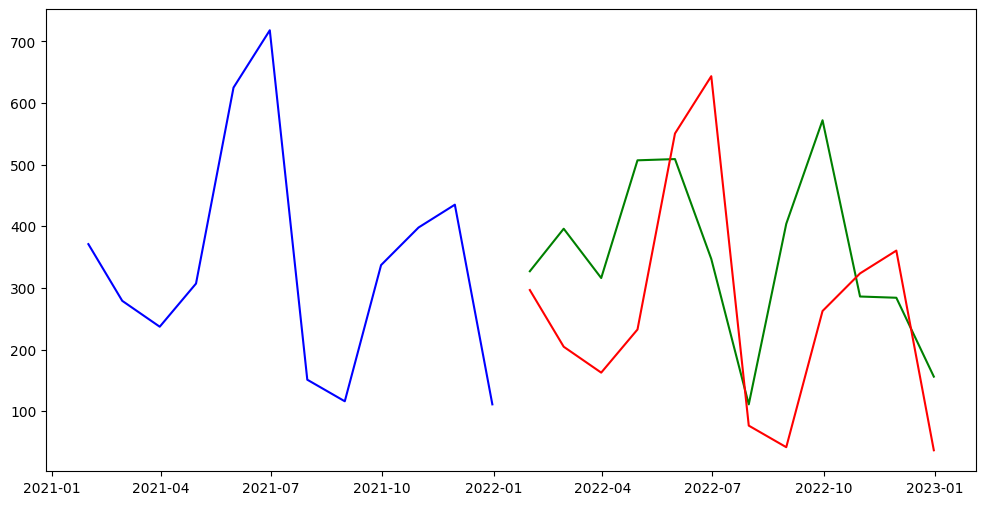

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Datos de entrada
enc = [371, 279, 237, 307, 625, 718, 151, 116, 337, 398, 435,
       111, 327, 396, 316, 507, 509, 347, 111, 404, 572, 286, 284, 156]

# Crear una serie temporal
fechas = pd.date_range(start='2021-01-01', periods=len(enc), freq='M')
data = pd.Series(enc, index=fechas)

# Dividir en entrenamiento y prueba (últimos 12 meses para prueba)
train = data[:-12]
test = data[-12:]

# Ajustar el modelo SARIMAX
# Parámetros: (p, d, q) para el componente no estacional
# Parámetros: (P, D, Q, s) para el componente estacional (s=12 para datos mensuales)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Pronóstico para los próximos 12 meses
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Evaluación del modelo en los datos de prueba
mae = mean_absolute_error(test, forecast_mean)
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Visualización de resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Entrenamiento', color='blue')
plt.plot(test.index, test, label='Prueba', color='green')
plt.plot(forecast_mean.index, forecast_mean, label='Pronóstico', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Pronóstico de Encuestas usando SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Número de Encuestas')
plt.legend()
plt.show()

# Pronóstico para los próximos 12 meses (futuro)
future_forecast = results.get_forecast(steps=12)
future_forecast_mean = future_forecast.predicted_mean
print("Pronóstico para los próximos 12 meses:")
print(future_forecast_mean)

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

int64
MAE: 160.6666357500155
RMSE: 199.18057344367162


c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

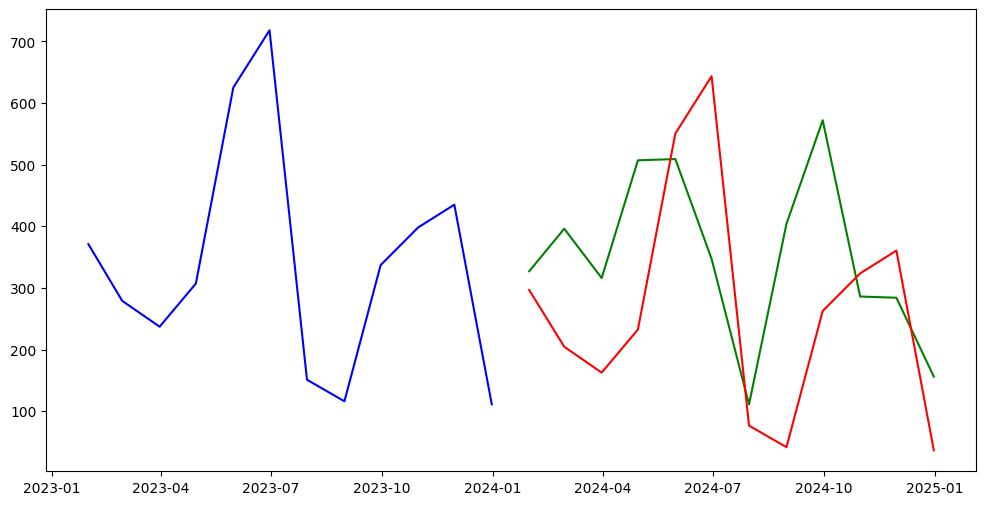

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Datos de entrada
enc = [371, 279, 237, 307, 625, 718, 151, 116, 337, 398, 435,
       111, 327, 396, 316, 507, 509, 347, 111, 404, 572, 286, 284, 156]

# Crear una serie temporal con índices de fecha
fechas = pd.date_range(start='2023-01-01', periods=len(enc), freq='M')
data = pd.Series(enc, index=fechas)

# Verificar que los datos sean numéricos
print(data.dtype)  # Debe ser int64 o float64

# Dividir en entrenamiento y prueba (últimos 12 meses para prueba)
train = data[:-12]
test = data[-12:]

# Ajustar el modelo SARIMAX
# Parámetros: (p, d, q) para el componente no estacional
# Parámetros: (P, D, Q, s) para el componente estacional (s=12 para datos mensuales)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Pronóstico para los próximos 12 meses
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Evaluación del modelo en los datos de prueba
mae = mean_absolute_error(test, forecast_mean)
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Visualización de resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Entrenamiento', color='blue')
plt.plot(test.index, test, label='Prueba', color='green')
plt.plot(forecast_mean.index, forecast_mean, label='Pronóstico', color='red')
# Convertir las columnas de conf_int a float
conf_int = conf_int.astype(float)

# Luego ejecutar la visualización
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Pronóstico de Encuestas usando SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Número de Encuestas')
plt.legend()
plt.show()

# Pronóstico para los próximos 12 meses (futuro)
future_forecast = results.get_forecast(steps=12)
future_forecast_mean = future_forecast.predicted_mean
print("Pronóstico para los próximos 12 meses:")
print(future_forecast_mean)

In [59]:
2025-1999

26

In [61]:
# Pronóstico para los próximos 12 meses (futuro)
future_forecast = results.get_forecast(steps=12)
future_forecast_mean = future_forecast.predicted_mean
print("Pronóstico para los próximos 12 meses:")
print(future_forecast_mean)

Pronóstico para los próximos 12 meses:
2024-01-31    296.500093
2024-02-29    204.500093
2024-03-31    162.500093
2024-04-30    232.500093
2024-05-31    550.500093
2024-06-30    643.500093
2024-07-31     76.500093
2024-08-31     41.500093
2024-09-30    262.500093
2024-10-31    323.500093
2024-11-30    360.500093
2024-12-31     36.500093
Freq: M, Name: predicted_mean, dtype: float64


In [58]:
print(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1])

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='M') 2024-01-31   -1089.405464
2024-02-29   -1181.406850
2024-03-31   -1223.408236
2024-04-30   -1153.409622
2024-05-31    -835.411008
2024-06-30    -742.412393
2024-07-31   -1309.413779
2024-08-31   -1344.415165
2024-09-30   -1123.416551
2024-10-31   -1062.417937
2024-11-30   -1025.419323
2024-12-31   -1349.420709
Freq: M, Name: lower y, dtype: float64 2024-01-31    1682.405649
2024-02-29    1590.407035
2024-03-31    1548.408421
2024-04-30    1618.409807
2024-05-31    1936.411193
2024-06-30    2029.412579
2024-07-31    1462.413965
2024-08-31    1427.415351
2024-09-30    1648.416737
2024-10-31    1709.418123
2024-11-30    1746.419508
2024-12-31    1422.420894
Freq: M, Name: upper y, dtype: float64


c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


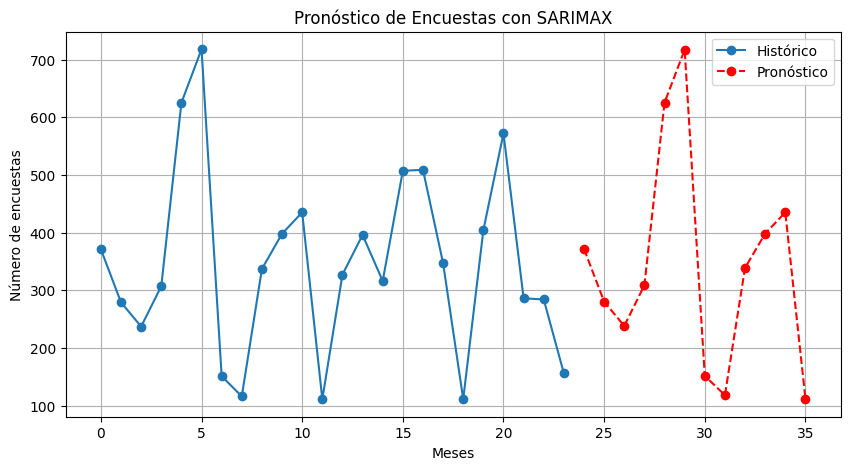

Pronóstico para los próximos 12 meses:
[371.6226585101669, 280.2883136740427, 238.07560910809315, 308.64301545486467, 625.261894283336, 717.1217071380939, 151.51427323782457, 118.01607029562126, 338.8206521413704, 398.23554540616357, 435.07992650896637, 111.89481898870565]


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Datos de encuestas
enc = [371,279,237,307,625,718,151,116,337,398,435,
       111,327,396,316,507,509,347,111,404,572,286,284,156]

# Convertir en serie de tiempo
enc_series = pd.Series(enc)

# Ajustar el modelo SARIMAX
model = sm.tsa.SARIMAX(enc_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# Hacer pronóstico para los próximos 12 meses
forecast = result.forecast(steps=12)-20

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(enc_series, label='Histórico', marker='o')
plt.plot(range(len(enc), len(enc) + 12), forecast, label='Pronóstico', marker='o', linestyle='dashed', color='red')
plt.xlabel('Meses')
plt.ylabel('Número de encuestas')
plt.title('Pronóstico de Encuestas con SARIMAX')
plt.grid()
plt.legend()
plt.show()

# Mostrar pronóstico
print("Pronóstico para los próximos 12 meses:")
print(forecast.tolist())

In [73]:
forecast-20

24    371.622659
25    280.288314
26    238.075609
27    308.643015
28    625.261894
29    717.121707
30    151.514273
31    118.016070
32    338.820652
33    398.235545
34    435.079927
35    111.894819
Name: predicted_mean, dtype: float64

In [77]:
for i in forecast:
    print(int(i))

371
280
238
308
625
717
151
118
338
398
435
111


In [63]:
pronostico=[391.6226585101669, 300.2883136740427, 258.07560910809315, 328.64301545486467, 645.261894283336, 737.1217071380939, 171.51427323782457, 138.01607029562126, 358.8206521413704, 418.23554540616357, 455.07992650896637, 131.89481898870565]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=314.750, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=316.936, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=312.797, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=315.000, Time=0.15 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=315.000, Time=0.20 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=317.000, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=316.565, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.814 seconds


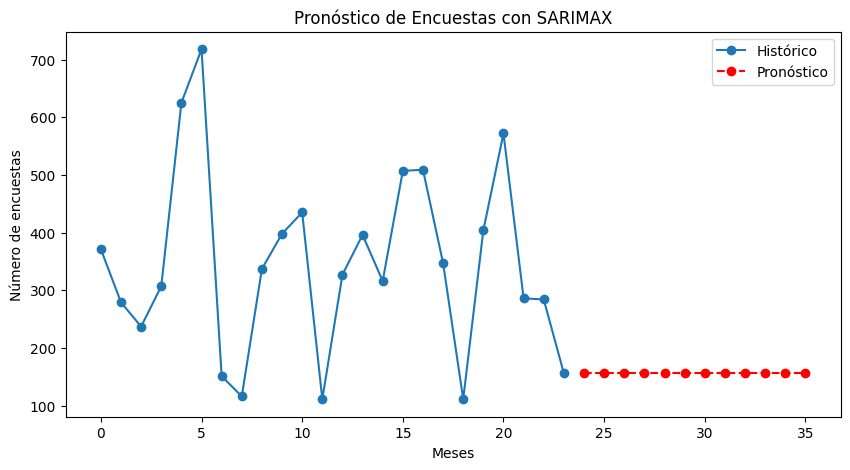

Pronóstico para los próximos 12 meses:
[156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0]


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima

# Datos de encuestas
enc = [371,279,237,307,625,718,151,116,337,398,435,
       111,327,396,316,507,509,347,111,404,572,286,284,156]

# Convertir en serie de tiempo
enc_series = pd.Series(enc)

# Usar auto_arima para encontrar los mejores parámetros
auto_model = auto_arima(enc_series, seasonal=True, m=12, trace=True, suppress_warnings=True,d=1, D=0)
order = auto_model.order
seasonal_order = auto_model.seasonal_order

# Ajustar el modelo SARIMAX con los parámetros óptimos
model = sm.tsa.SARIMAX(enc_series, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Hacer pronóstico para los próximos 12 meses
forecast = result.forecast(steps=12)

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(enc_series, label='Histórico', marker='o')
plt.plot(range(len(enc), len(enc) + 12), forecast, label='Pronóstico', marker='o', linestyle='dashed', color='red')
plt.xlabel('Meses')
plt.ylabel('Número de encuestas')
plt.title('Pronóstico de Encuestas con SARIMAX')
plt.legend()
plt.show()

# Mostrar pronóstico
print("Pronóstico para los próximos 12 meses:")
print(forecast.tolist())

In [64]:
sum=0
for i in pronostico:
    sum=sum+i
print(sum)

4334.57448474725


In [67]:
!pip install pmdarima

     -------------------------------------- 613.3/613.3 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 29.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
22900*1.16

26563.999999999996

In [1]:
import sys
import xlsxwriter
import pandas as pd
import sys
import psycopg2
import os
from dotenv import load_dotenv
from datetime import date

today = date.today()
load_dotenv()

#configurar la conexion a la base de datos
DB_USERNAME = os.getenv('DB_USERNAME')
DB_DATABASE = os.getenv('DB_DATABASE')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')
DB_HOST=os.getenv('DB_HOST')

# Conectar a DB
# Conectar a PostgreSQL
try:
    cnx = psycopg2.connect(
        user=DB_USERNAME,
        password=DB_PASSWORD,
        host=DB_HOST,
        port=DB_PORT,
        database=DB_DATABASE
    )
    print("Conexión exitosa")
except psycopg2.Error as e:
    print("Ocurrió un error al conectar a la base de datos:", e)

egresados=pd.read_sql("""select egresados.*, codigos.description from egresados inner join codigos on egresados.status=codigos.code    where muestra = 3 """,cnx)
print('len de egresados',len(egresados))
correos=pd.read_sql('select * from correos',cnx)
carreras=pd.read_sql('select * from carreras',cnx)
egresados=egresados.loc[~egresados['status'].isin([1,2,10])]
writer = pd.ExcelWriter('storage/correos_muestra_sin_contestar.xlsx', engine='xlsxwriter')

workbook = writer.book
a_color='#173d83'
#estilos----------------
negro_b = workbook.add_format({
    'bold': 2,
    'border': 0,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':13}) 
header_format = workbook.add_format({
    'bold': True,
    'bg_color': a_color,
    'text_wrap': True,
    'valign': 'top',
    'align': 'center',
    'border_color':'white',
    'font_color': 'white',
    'border': 1,
    'font_size':12})
blue_content = workbook.add_format({
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':10,
    'border_color':a_color})
date_content = workbook.add_format({
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':10,
    'border_color':a_color,
    'num_format': 'dd/mm/yy'})
date_content_bold = workbook.add_format({
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':12,
    'bold': True,
    'num_format': 'dd/mm/yy'})
worksheet = workbook.add_worksheet()
worksheet.merge_range('C2:H3', 'PROGRAMA DE VINCULACION A EGRESADOS UNAM', negro_b)
worksheet.merge_range('C4:H4', 'EGRESADOS QUE NO HAN CONTESTADO 2020', negro_b)
worksheet.insert_image("A1", "img/logoPVE.png",{"x_scale": 0.2, "y_scale": 0.2})
worksheet.merge_range('G6:H6',today, date_content_bold)

worksheet.write('B8','Estatus',header_format)
worksheet.write('C8','Fecha en que se marco',header_format)
worksheet.write('D8','Nombre',header_format)
worksheet.write('E8','Paterno',header_format)
worksheet.write('F8','Materno',header_format)
worksheet.write('G8','Numero de cuenta',header_format)
worksheet.write('H8','Carrera',header_format)
worksheet.write('I8','Plantel',header_format)
worksheet.write('J8','Correo 1',header_format)
worksheet.write('K8','Correo 2',header_format)
worksheet.write('L8','Correo 3',header_format)
worksheet.write('M8','Correo 4',header_format)

for i in range(0,len(egresados)):
    
    correos_eg=correos.loc[correos['cuenta']==egresados['cuenta'].values[i]]
    # print(egresados['cuenta'].values[i],len(correos_eg))
    worksheet.write('B'+str(i+9),egresados['description'].values[i],blue_content)
    worksheet.write('C'+str(i+9),str(egresados['updated_at'].values[i])[0:10],blue_content)
    worksheet.write('D'+str(i+9),egresados['nombre'].values[i],blue_content)
    worksheet.write('E'+str(i+9),egresados['paterno'].values[i],blue_content)
    worksheet.write('F'+str(i+9),egresados['materno'].values[i],blue_content)
    worksheet.write('G'+str(i+9),egresados['cuenta'].values[i],blue_content)
    worksheet.write('H'+str(i+9),carreras.loc[carreras['clave_carrera']==egresados['carrera'].values[i],'carrera'].values[0],blue_content)
    worksheet.write('I'+str(i+9),carreras.loc[carreras['clave_plantel']==egresados['plantel'].values[i],'plantel'].values[0],blue_content)
    for j in range(len(correos_eg)):
        worksheet.write(i+8,9+j,correos_eg['correo'].values[j],blue_content)

worksheet.set_column('B:D',17)
worksheet.set_column('E:E',20)
worksheet.set_column('F:M',28)
worksheet.set_landscape()
worksheet.set_paper(9)
worksheet.fit_to_pages(1, 1)  
workbook.close()

Conexión exitosa


c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


len de egresados 19494


c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [ ]:
destac19=pd.read_sql("""select respuestas2.cuenta,respuestas2.nombre,respuestas2.paterno,respuestas2.materno,nar1_a
                     from respuestas2 inner join egresados on egresados.cuenta=respuestas2.cuenta
                      where respuestas2.nar1_a is not null and egresados.anio_egreso =2019""",cnx)



c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
len(recados)

47015

In [4]:
# QUE PASÓ CON LOS RECADOS?
recados=pd.read_sql('select * from recados',cnx)

c:\Users\fgonzalez\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
from pandas.tseries.offsets import MonthEnd


In [7]:
date_col='created_at'

for beg in pd.date_range('2024-01-01', '2024-12-31', freq='MS'):
    init_fec=beg.strftime("%Y-%m-%d")
    end_fec=(beg + MonthEnd(1)).strftime("%Y-%m-%d")

    recados_mes=recados.loc[(recados[date_col]>=init_fec)&(recados[date_col]<=end_fec)]
    print(init_fec,end_fec,len(recados_mes))
    # print

2024-01-01 2024-01-31 193
2024-02-01 2024-02-29 3103
2024-03-01 2024-03-31 3630
2024-04-01 2024-04-30 5421
2024-05-01 2024-05-31 4858
2024-06-01 2024-06-30 4793
2024-07-01 2024-07-31 525
2024-08-01 2024-08-31 1372
2024-09-01 2024-09-30 3821
2024-10-01 2024-10-31 4728
2024-11-01 2024-11-30 2587
2024-12-01 2024-12-31 1564


In [8]:
import datetime
date_col='fecha'

for beg in pd.date_range('2024-08-01', '2025-02-28', freq='W'):
    init_fec=beg.strftime("%Y-%m-%d")
    end_fec=(beg+datetime.timedelta(days=6)).strftime("%Y-%m-%d")
    recados_mes=recados.loc[(recados[date_col]>=init_fec)&(recados[date_col]<=end_fec)]
    print(init_fec,end_fec,len(recados_mes))
    # print

2024-08-04 2024-08-10 79
2024-08-11 2024-08-17 325
2024-08-18 2024-08-24 321
2024-08-25 2024-08-31 662
2024-09-01 2024-09-07 557
2024-09-08 2024-09-14 1150
2024-09-15 2024-09-21 972
2024-09-22 2024-09-28 1142
2024-09-29 2024-10-05 1000
2024-10-06 2024-10-12 1316
2024-10-13 2024-10-19 998
2024-10-20 2024-10-26 1132
2024-10-27 2024-11-02 719
2024-11-03 2024-11-09 917
2024-11-10 2024-11-16 592
2024-11-17 2024-11-23 426
2024-11-24 2024-11-30 669
2024-12-01 2024-12-07 1073
2024-12-08 2024-12-14 491
2024-12-15 2024-12-21 0
2024-12-22 2024-12-28 0
2024-12-29 2025-01-04 0
2025-01-05 2025-01-11 861
2025-01-12 2025-01-18 1504
2025-01-19 2025-01-25 1578
2025-01-26 2025-02-01 1789
2025-02-02 2025-02-08 1554
2025-02-09 2025-02-15 1822
2025-02-16 2025-02-22 826
2025-02-23 2025-03-01 0


In [61]:
!pip install pygame

     --------------------------------------- 10.6/10.6 MB 10.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import datetime
date_col='fecha'
for beg in pd.date_range('2024-08-01', '2025-02-28', freq='C'):
    init_fec=beg.strftime("%Y-%m-%d")
    end_fec=(beg+datetime.timedelta(days=1)).strftime("%Y-%m-%d")
    recados_mes=recados.loc[recados[date_col].astype(str).str.slice(0,10)==str(beg)[:10]]
    print(str(beg)[:10],len(recados_mes))

2024-08-01 0
2024-08-02 0
2024-08-05 0
2024-08-06 0
2024-08-07 0
2024-08-08 6
2024-08-09 73
2024-08-12 75
2024-08-13 32
2024-08-14 53
2024-08-15 113
2024-08-16 52
2024-08-19 62
2024-08-20 76
2024-08-21 41
2024-08-22 70
2024-08-23 72
2024-08-26 157
2024-08-27 90
2024-08-28 107
2024-08-29 126
2024-08-30 182
2024-09-02 122
2024-09-03 163
2024-09-04 52
2024-09-05 102
2024-09-06 118
2024-09-09 223
2024-09-10 252
2024-09-11 193
2024-09-12 245
2024-09-13 237
2024-09-16 0
2024-09-17 212
2024-09-18 215
2024-09-19 367
2024-09-20 178
2024-09-23 219
2024-09-24 321
2024-09-25 167
2024-09-26 215
2024-09-27 220
2024-09-30 219
2024-10-01 0
2024-10-02 265
2024-10-03 286
2024-10-04 230
2024-10-07 254
2024-10-08 249
2024-10-09 292
2024-10-10 258
2024-10-11 263
2024-10-14 156
2024-10-15 275
2024-10-16 232
2024-10-17 223
2024-10-18 112
2024-10-21 310
2024-10-22 298
2024-10-23 128
2024-10-24 198
2024-10-25 198
2024-10-28 265
2024-10-29 165
2024-10-30 63
2024-10-31 226
2024-11-01 0
2024-11-04 213
2024-11-05 

In [50]:
str(beg)[:10]

'2025-02-28'

In [44]:
recados[date_col].astype(str).str.slice(0,10)

0        2024-01-18
1        2024-01-18
2        2024-01-18
3        2024-01-18
4        2024-01-18
            ...    
47010    2025-02-17
47011    2025-02-17
47012    2025-02-17
47013    2025-02-17
47014    2025-02-17
Name: created_at, Length: 47015, dtype: object

In [ ]:
recados['created_at']

0       2024-01-18 18:19:49+00:00
1       2024-01-18 18:20:38+00:00
2       2024-01-18 18:21:44+00:00
3       2024-01-18 18:23:21+00:00
4       2024-01-18 18:28:26+00:00
                   ...           
47010   2025-02-17 17:39:59+00:00
47011   2025-02-17 17:41:01+00:00
47012   2025-02-17 17:42:26+00:00
47013   2025-02-17 17:45:53+00:00
47014   2025-02-17 17:48:32+00:00
Name: created_at, Length: 47015, dtype: datetime64[ns, UTC]

In [56]:
len(recados.loc[recados['user_id']==9])

9027

In [58]:
from datetime import datetime, timedelta

def obtener_quincena(num_quincena, año, mes):
    if num_quincena not in [1, 2]:
        raise ValueError("El número de quincena debe ser 1 o 2.")
    
    if mes < 1 or mes > 12:
        raise ValueError("El mes debe estar entre 1 y 12.")
    
    # Obtener el primer día del mes
    primer_dia_mes = datetime(año, mes, 1)
    
    # Obtener el último día del mes
    if mes == 12:
        siguiente_mes = datetime(año + 1, 1, 1)
    else:
        siguiente_mes = datetime(año, mes + 1, 1)
    
    ultimo_dia_mes = siguiente_mes - timedelta(days=1)
    
    if num_quincena == 1:
        inicio_quincena = primer_dia_mes.day
        fin_quincena = 14
    else:
        inicio_quincena = 15
        fin_quincena = ultimo_dia_mes.day
    
    return inicio_quincena, fin_quincena

# Ejemplo de uso
año = 2025
mes = 2
num_quincena = 2

inicio, fin = obtener_quincena(num_quincena, año, mes)
print(f"Quincena {num_quincena} del {mes}/{año}: Inicia el día {inicio} y termina el día {fin}")

Quincena 2 del 2/2025: Inicia el día 15 y termina el día 28


In [ ]:
recados.loc[(recados['created_at']>='2024-03-01')&(recados['created_at']<='2024-03-28')]

,id,cuenta,recado,fecha,status,updated_at,created_at,user_id,tel_id
3518,3599,312193186,Suena una grabación que indica que el número n...,2024-02-29 18:00:19+00:00,11,2024-03-01 00:00:19+00:00,2024-03-01 00:00:19+00:00,16.0,38935.0
3519,3600,417025733,No suena,2024-02-29 18:01:40+00:00,7,2024-03-01 00:01:40+00:00,2024-03-01 00:01:40+00:00,9.0,45393.0
3520,3601,314309576,"No se enlaza la llamada, después de marcar no ...",2024-02-29 18:02:02+00:00,7,2024-03-01 00:02:02+00:00,2024-03-01 00:02:02+00:00,16.0,39130.0
3521,3602,314122438,Dejé mensaje con un familiar,2024-02-29 18:04:54+00:00,12,2024-03-01 00:04:54+00:00,2024-03-01 00:04:54+00:00,16.0,38862.0
3522,3603,313320992,None,2024-02-29 18:05:48+00:00,11,2024-03-01 00:05:48+00:00,2024-03-01 00:05:48+00:00,16.0,6701.0
...,...,...,...,...,...,...,...,...,...
7149,7248,314118080,No contesta,2024-03-22 11:11:21+00:00,7,2024-03-22 17:11:21+00:00,2024-03-22 17:11:21+00:00,10.0,43321.0
7150,7249,314316097,Deje recado- papá,2024-03-22 11:13:10+00:00,12,2024-03-22 17:13:10+00:00,2024-03-22 17:13:10+00:00,10.0,43318.0
7151,7250,313201154,No contesta,2024-03-22 11:21:07+00:00,7,2024-03-22 17:21:07+00:00,2024-03-22 17:21:07+00:00,10.0,7624.0
7152,7251,313323508,ocupado,2024-03-22 11:22:23+00:00,7,2024-03-22 17:22:23+00:00,2024-03-22 17:22:23+00:00,13.0,6146.0
